<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA - EDUCACIÓN CONTINUADA** <br>
**Análisis espacial de datos y sus aplicaciones en Python** <br>
**PROFESORES:** Germán González <br><br>


# Clase 3: Estadísticas descriptivas de geolocalización

- Mapas de calor.
- Estimación de Densidad de Kernel.


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import shapely.ops as ops
from matplotlib import colors
from sklearn.neighbors import grilla_buffer.crs
from sklearn.model_selection import GridSearchCV


/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Markers: https://matplotlib.org/3.2.1/api/markers_api.html

### Vivienda nueva en Bogotá 

In [2]:
viviendas = pd.read_csv('Datos/vivienda_nueva_bta.csv')

In [3]:
viviendas

,Direccion,Barrio,Latitud,Longitud,Tipo_vivienda,Dproymes,Localidad,Cod_proyecto,Proyecto
0,Cr. 92 # 149-30,Campiña,-74.084032,4.744768,No VIS,Abril,Suba,20275,Colinas de Suba
1,Cr. 7 # 126-30,Pinar de Santa Bárbara,-74.028022,4.701646,No VIS,Abril,Usaquén,30712,Reserva de la Sierra
2,Tv. 19A # 96-56,Chicó,-74.053723,4.684059,No VIS,Abril,Chapinero,30959,Oqyana
3,Av. Suba con 119,Córdoba,-74.067317,4.706892,No VIS,Abril,Suba,31238,Provenza Imperial
4,Cl. 94 # 21-59,Chicó,-74.056800,4.681600,No VIS,Abril,Chapinero,31422,Art 94
...,...,...,...,...,...,...,...,...,...
628,Cr. 7 # 6-15 Sur,Calvo Sur,-74.084578,4.582397,No VIS,Abril,San Cristóbal,407123,Ed. Ludwyg
629,Cl. 36 Sur # 51D-53,El Tejar,-74.128551,4.601916,No VIS,Abril,Puente Aranda,407124,Ed. Alcala
630,Tv. 35 # 27B-21 Sur,Los Sauces,-74.115590,4.595823,No VIS,Abril,Puente Aranda,407125,Ed. Ebenezzer
631,Av. Cr. 70C # 57R-75 Sur,Perdomo,-74.162266,4.593081,VIS,Abril,Ciudad Bolívar,407128,Estancia 70


In [4]:
viviendas.rename(columns={'Latitud': 'lon', 'Longitud':'lat'}, inplace = True)

In [5]:
viviendas[['lon', 'lat']].apply(Point, axis = 1)

0      POINT (-74.08403178899999 4.744767632999982)
1      POINT (-74.02802187499998 4.701645924999981)
2      POINT (-74.05372283700002 4.684059235999996)
3      POINT (-74.06731719300001 4.706891700000028)
4      POINT (-74.05680000000002 4.681600000999992)
                           ...                     
628    POINT (-74.08457805199998 4.582396764000008)
629    POINT (-74.12855075800002 4.601915764000012)
630     POINT (-74.11558958900001 4.59582268600002)
631    POINT (-74.16226561299999 4.593080907000001)
632    POINT (-74.06345299999998 4.845452000000023)
Length: 633, dtype: object

In [6]:
viviendas['geom'] = viviendas[['lon', 'lat']].apply(Point, axis = 1)

In [7]:
viviendas = gpd.GeoDataFrame(viviendas.drop(columns = 'geom'), geometry = viviendas['geom'])
viviendas.crs = {'init' :'epsg:4326'}

/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [8]:
shp_bog = gpd.read_file("Datos/Localidades/Loca.shp", encoding = "utf-8")
shp_bog = shp_bog.set_index('LocNombre', drop=True)
shp_bog.crs = {'init' :'epsg:4326'}
shp_bog = shp_bog.drop('SUMAPAZ',axis=0) 

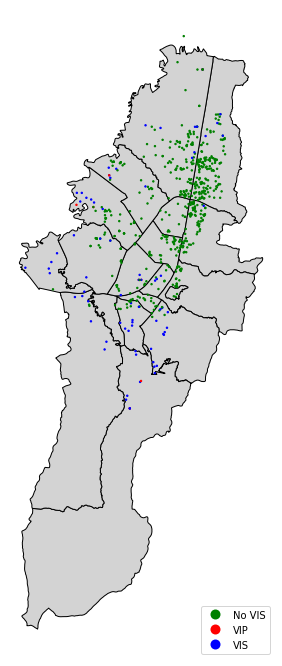

In [9]:
hcmap = colors.ListedColormap(['green', 'red','blue'])
# Crear una figura blanca 
fig, ax = plt.subplots(figsize = (8,12))
# Graficar figura de bogota
shp_bog.plot(color = 'lightgrey', edgecolor = 'k', ax = ax)
# Graficar por tipo de viviendas en la escala de colores
viviendas.plot(column = 'Tipo_vivienda', categorical = True, markersize = 2, cmap = hcmap, ax = ax, 
               legend = True, legend_kwds={'loc': 'lower right'})
ax.axis('off');

In [10]:
bogota = ops.cascaded_union(shp_bog['geometry'])

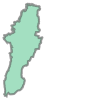

In [11]:
bogota

In [12]:
viviendas = viviendas[viviendas.intersects(bogota)]

In [13]:
shp_bog.head()

,LocAAdmini,LocArea,LocCodigo,SHAPE_Leng,SHAPE_Area,geometry
LocNombre,,,,,,
ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327..."
TUNJUELITO,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,"POLYGON ((-74.13777 4.59489, -74.13165 4.59363..."
RAFAEL URIBE URIBE,Acuerdo 117 de 2003,1.383408e+07,18,0.174513,0.001126,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
CANDELARIA,Acuerdo 117 de 2003,2.060243e+06,17,0.067158,0.000168,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
BARRIOS UNIDOS,Acuerdo 8 de 1977,1.190345e+07,12,0.121180,0.000969,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."


In [14]:
viviendas.head()

,Direccion,Barrio,lon,lat,Tipo_vivienda,Dproymes,Localidad,Cod_proyecto,Proyecto,geometry
0,Cr. 92 # 149-30,Campiña,-74.084032,4.744768,No VIS,Abril,Suba,20275,Colinas de Suba,POINT (-74.08403 4.74477)
1,Cr. 7 # 126-30,Pinar de Santa Bárbara,-74.028022,4.701646,No VIS,Abril,Usaquén,30712,Reserva de la Sierra,POINT (-74.02802 4.70165)
2,Tv. 19A # 96-56,Chicó,-74.053723,4.684059,No VIS,Abril,Chapinero,30959,Oqyana,POINT (-74.05372 4.68406)
3,Av. Suba con 119,Córdoba,-74.067317,4.706892,No VIS,Abril,Suba,31238,Provenza Imperial,POINT (-74.06732 4.70689)
4,Cl. 94 # 21-59,Chicó,-74.056800,4.681600,No VIS,Abril,Chapinero,31422,Art 94,POINT (-74.05680 4.68160)


In [15]:
gpd.sjoin(shp_bog, viviendas).head()

,LocAAdmini,LocArea,LocCodigo,SHAPE_Leng,SHAPE_Area,geometry,index_right,Direccion,Barrio,lon,lat,Tipo_vivienda,Dproymes,Localidad,Cod_proyecto,Proyecto
LocNombre,,,,,,,,,,,,,,,,
ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327...",598,Cr. 10 # 19-33 Sur,Ciudad Jardin,-74.094498,4.576440,No VIS,Abril,Antonio Nariño,407061,Edificio Toledo
ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327...",422,Cr. 10 # 15-64 Sur,Ciudad Jardin Sur,-74.092500,4.579700,No VIS,Abril,Antonio Nariño,51007,Edificio Jardines 15-64
ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327...",431,Cl. 11 Sur # 10A-08,Ciudad Berna,-74.091083,4.582989,No VIS,Abril,Antonio Nariño,51032,Capital Berna IV
ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327...",427,Cr. 10 # 8-55 Sur,Ciudad Berna,-74.089300,4.583500,No VIS,Abril,Antonio Nariño,51020,Ten Life
ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327...",430,Cr. 13 # 9-12 Sur,Ciudad Berna,-74.092730,4.586325,No VIS,Abril,Antonio Nariño,51031,Capital Berna III


In [16]:
viviendas_loc = gpd.sjoin(shp_bog, viviendas).groupby(['LocCodigo']).size().reset_index(name = 'proyectos')
viviendas_loc

,LocCodigo,proyectos
0,01,158
1,02,76
2,03,22
3,04,18
4,05,10
5,07,7
6,08,25
7,09,41
8,10,33
9,11,108


In [17]:
### --- Juntar las dos bases de datos ---- ####
viviendas_loc = pd.merge(shp_bog,viviendas_loc)
viviendas_loc.size

126

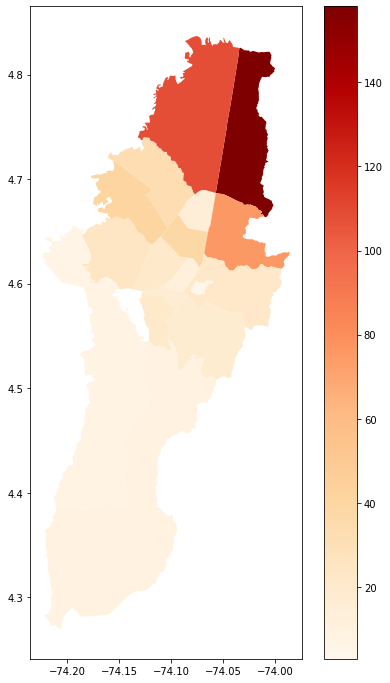

In [18]:
viviendas_loc.plot(column = 'proyectos', figsize = (8,12), cmap = 'OrRd', legend = True);

In [19]:
### Hacer merge conservando los datos 
viviendas_loc = gpd.sjoin(shp_bog, viviendas).groupby(['LocCodigo']).size().reset_index(name = 'proyectos')
viviendas_loc = pd.merge(shp_bog,viviendas_loc, how = 'left')
viviendas_loc.size

133

In [20]:
### Llenar los nan con cero para la columna de proyectos 
viviendas_loc.fillna({'proyectos': 0}, inplace = True)

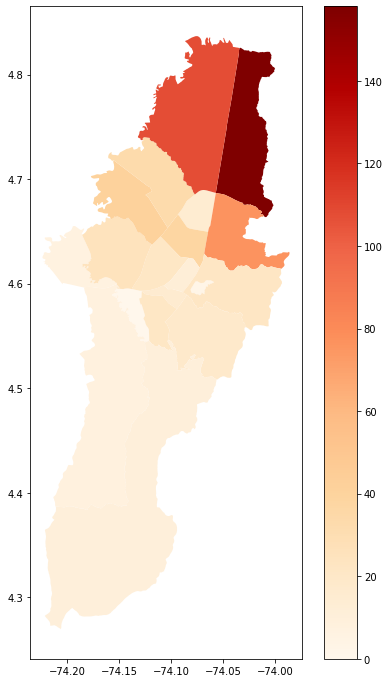

In [21]:
viviendas_loc.plot(column = 'proyectos', figsize = (8,12), cmap = 'OrRd', legend = True);

#### Creamos una grilla discreta sobre Bogotá para evaluar nuestra estimación

In [51]:
poligono = bogota
#### ---- Tamaño de la grilla en grados ------ ### 
delta = 0.005

poligonos = []
#### ------ Extremos del poligono ----- ##### 
min_x, min_y, max_x, max_y = poligono.bounds
x = min_x
y = min_y
### ----- Siempre que este acotado dentro de los limites de la figura ------ ###
while x <= max_x:
    while y <= max_y:
        random_poly = Polygon([(x, y), (x + delta, y), (x + delta, y - delta), (x, y - delta)])
        ### --- Verificar que si este dentro de la figura 
        if (random_poly.within(poligono)):
            ### --- Si sí está dentro de la figura añadirlo como un punto valido de la grilla 
            poligonos.append(random_poly)
        ### --- Redifinir el punto como el siguiente más el delta 
        y = y + delta
        
    
    y = min_y
    ### --- Redifinir para x más el delta 
    x = x + delta
    
grilla_buffer = gpd.GeoDataFrame(geometry = poligonos)

In [52]:
grilla_buffer.crs = {'init' :'epsg:4326'}

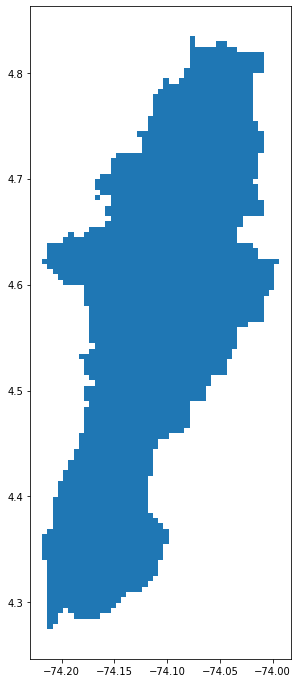

In [53]:
grilla_buffer.plot(figsize = (8,12));

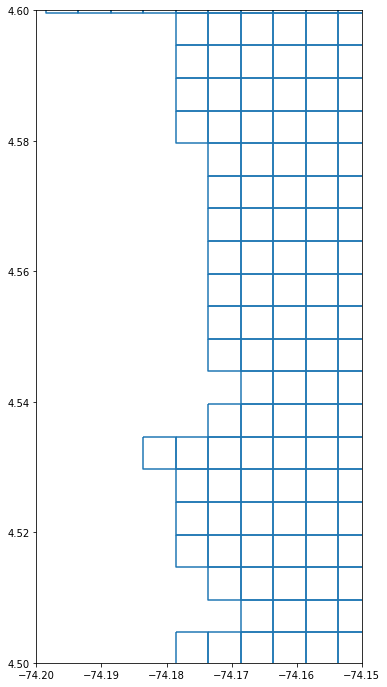

In [54]:
grilla_buffer.boundary.plot(figsize = (8,12))
plt.xlim(-74.2, -74.15)
plt.ylim(4.5, 4.6);

In [55]:
### Agrupar en la grilla cuantos proyectos caen dentro de cada cuadrado
viviendas_grid = gpd.sjoin(grilla_buffer, viviendas).reset_index().groupby(['index']).size().reset_index(name = 'proyectos')
### juntar bases de datos
viviendas_grid = pd.merge(grilla_buffer,viviendas_grid, how = 'left', right_on = 'index', left_index = True)
### Remplazar datos vacios de proyectos
viviendas_grid.fillna({'proyectos': 0}, inplace = True)
### ----- Reiniciar indices 
viviendas_grid = viviendas_grid.sort_values('proyectos').reset_index(drop=True)

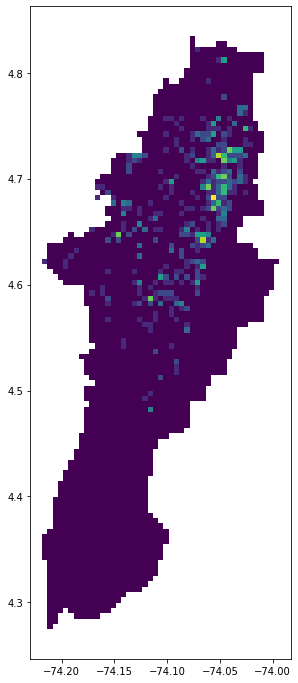

In [56]:
viviendas_grid.plot(figsize = (8,12), column = 'proyectos');

In [58]:
#### ---- Tamaño de la grilla en grados ------ ### 
delta = 0.002
## Definir lista vacia para almacenar latitudes y longitudes 
puntos_lon = []
puntos_lat = []
#### ------ Extremos del poligono ----- ##### 
min_x, min_y, max_x, max_y = poligono.bounds
### --- Inicializar ----- ###
x = min_x
y = min_y
### ----- Siempre que este acotado dentro de los limites de la figura ------ ###
while x <= max_x:
    while y <= max_y:
        random_point = Point(x,y)
        ### --- Verificar que si este dentro de la figura 
        if (random_point.within(poligono)):
            ### --- Si sí está dentro de la figura añadirlo como un punto valido de la grilla 
            puntos_lon.append(random_point.x)
            puntos_lat.append(random_point.y)
        y = y + delta
    y = min_y
    x = x + delta
    
grilla = pd.DataFrame({'lon':puntos_lon, 'lat':puntos_lat})

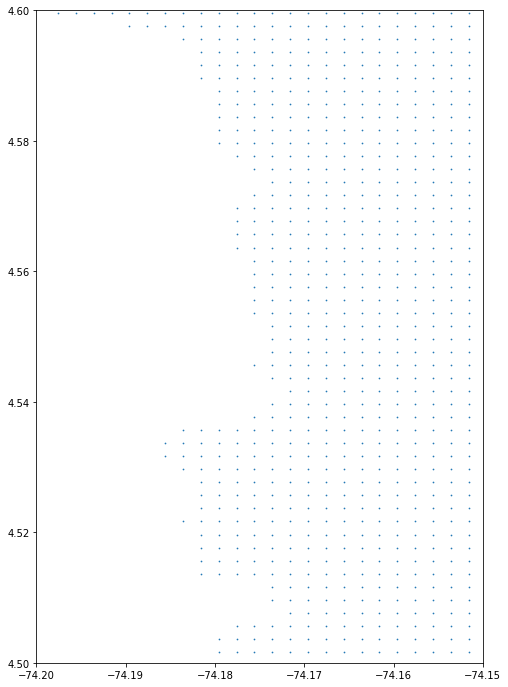

In [60]:
fig, ax = plt.subplots(figsize = (8,12))
ax.scatter(grilla['lon'], grilla['lat'], s = 0.5)
plt.xlim(-74.2, -74.15)
plt.ylim(4.5, 4.6);

### Scikit-Learn es la librería por excelencia para machine learning en python. 
### Cuenta con una implementación de Estimación de Densidad de Kernel y funciones para calibrar los modelos

In [63]:
#### ----- Definición de parámetros ----- #####
kd = KernelDensity(bandwidth=0.003)
##### -------- Ajustar el modelo a los datos ------- ######
kd.fit(viviendas[['lon', 'lat']])

KernelDensity(bandwidth=0.003)

In [64]:
### Evaluar la densidad logaritmica del modelo en los datos 
logdata = kd.score_samples(grilla[['lon','lat']])

In [65]:
logdata

array([   1.08928981,   -0.25464619,   -2.04302663, ..., -225.10828735,
       -244.43683123, -238.30207395])

In [66]:
grilla['intensidad'] = round(np.exp(pd.Series(logdata)))
## ------ Normalizar entre 0 y 1 ----- #####
grilla['intensidad'] = grilla['intensidad']/grilla['intensidad'].max()

In [69]:
grilla['intensidad']

0        0.006881
1        0.002294
2        0.000000
3        0.000000
4        0.000000
           ...   
17410    0.000000
17411    0.000000
17412    0.000000
17413    0.000000
17414    0.000000
Name: intensidad, Length: 17415, dtype: float64

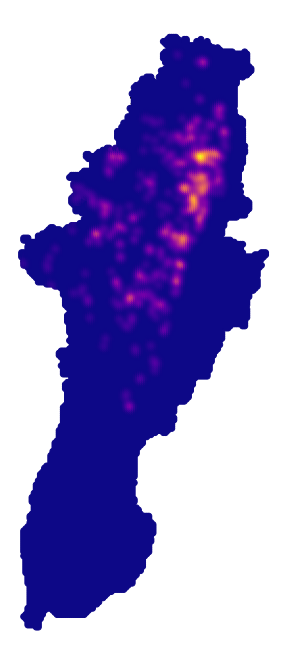

In [72]:
fig, ax = plt.subplots(figsize = (8,12))
shp_bog.plot(color = 'white', edgecolor = 'k', ax = ax)
ax.scatter(grilla['lon'], grilla['lat'], c = grilla['intensidad'], cmap = 'plasma')
ax.axis('off');

## Ancho de banda regla del pulgar

In [73]:
#### Desviaciones grados
Desviaciones = viviendas[['lon', 'lat']].std() 

In [74]:
## Calcular bw_mise 
bw_mise = 1.06*np.prod(Desviaciones)*(len(viviendas)**(-1/5))

In [75]:
bw_mise

0.0006351018435699798

In [76]:
kd_mise = KernelDensity(bandwidth=bw_mise)
kd_mise.fit(viviendas[['lon', 'lat']])

KernelDensity(bandwidth=0.0006351018435699798)

In [77]:
grilla['intensidad_mise'] = np.exp(pd.Series(kd_mise.score_samples(grilla[['lon','lat']])))

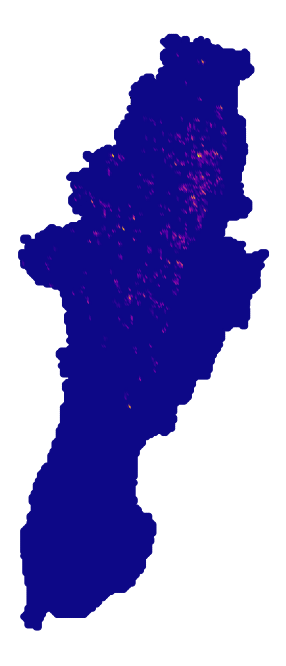

In [80]:
fig, ax = plt.subplots(figsize = (8,12))
shp_bog.plot(color = 'lightgrey', edgecolor = 'k', ax = ax)
ax.scatter(grilla['lon'], grilla['lat'], c = grilla['intensidad_mise'], cmap = 'plasma')
ax.axis('off');

#### Ancho de banda con búsqueda en grilla y validación cruzada

In [82]:
#### -------- Definir diferentes parametros ----- #####
parameters = {'bandwidth': np.arange(0.001,0.101,0.001)}

In [86]:
parameters

{'bandwidth': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
        0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
        0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
        0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
        0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
        0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
        0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
        0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
        0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
        0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
        0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
        0.1  ])}

In [87]:
gs =  GridSearchCV(KernelDensity(),parameters,n_jobs=-1,cv=5)
gs.fit(viviendas[['lon', 'lat']])
kd_cv = gs.best_estimator_

In [88]:
kd_cv

KernelDensity(bandwidth=0.007)

In [91]:
grilla[['lon','lat']]

,lon,lat
0,-74.221581,4.625664
1,-74.221581,4.627664
2,-74.221581,4.629664
3,-74.219581,4.281664
4,-74.219581,4.339664
...,...,...
17410,-73.989581,4.625664
17411,-73.989581,4.627664
17412,-73.989581,4.629664
17413,-73.987581,4.627664


In [89]:
grilla['intensidad_best'] = np.exp(pd.Series(kd_cv.score_samples(grilla[['lon','lat']])))

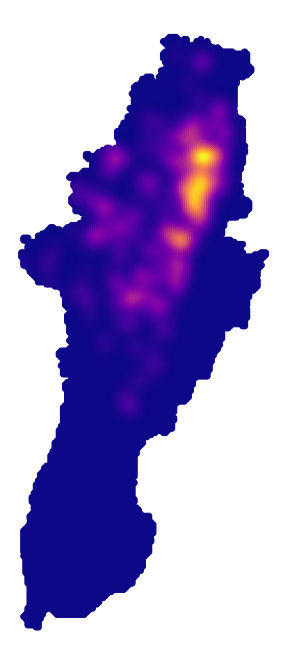

In [90]:
fig, ax = plt.subplots(figsize = (8,12))
shp_bog.plot(color = 'lightgrey', edgecolor = 'white', ax = ax)
ax.scatter(grilla['lon'], grilla['lat'], c = grilla['intensidad_best'], cmap = 'plasma')
ax.axis('off');